In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Import Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Ecommerce Customers.csv')

## About Dataset

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df = df.select_dtypes(exclude=['object'])
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


## Check for missing values
Missing values in the data results in poor model performance.

In [7]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

---

Our model has no missing values. But if we had missing values, we can deal with them in these main ways

- Getting rid of customers with a lot of missing values in their columns.

- Getting rid of the whole attribute or remove the whole column.

- Setting the missing values to some value (zero, the mean, the median, etc.).

In [8]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.0,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.0,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.0,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.0,499.31,79.31,256.67,445.04,498.89,549.31,765.52


## Explore our Target Variable[Yearly Amount Spent]

In [9]:
# Descriptive statistics summary
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

## Assumption 1 - There must be a linear relationship between our independent variables and the dependent variable

This assumption can be verified using a pairwise scatter plot.

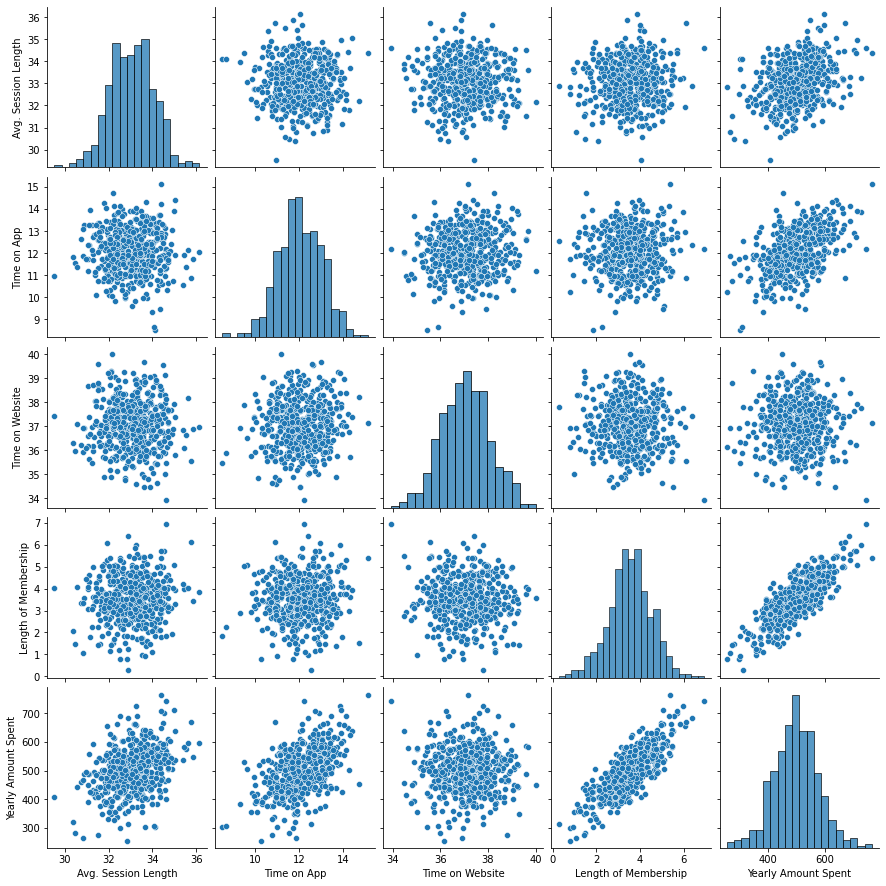

In [12]:
sns.pairplot(df)

## Detect Outliers
An outlier represents a data point that is too small or large. It can influence the model by inflating error rates. If there are outliers in the data, remove them, or replace them with the mean value or median value.



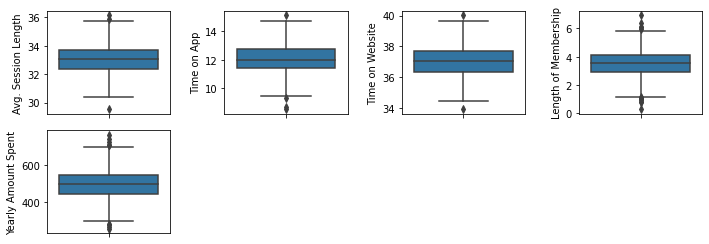

In [14]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(df.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

## Dealing with outliers

To remove noisy data, we are going to remove customers where we have some attribute that is above the 0.999 quantile, highly abnormal datapoint. 

In [15]:
high_quant = df.quantile(.999)

for i in df.columns:
    df= df.drop(df[i][df[i]>high_quant[i]].index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   496 non-null    float64
 1   Time on App           496 non-null    float64
 2   Time on Website       496 non-null    float64
 3   Length of Membership  496 non-null    float64
 4   Yearly Amount Spent   496 non-null    float64
dtypes: float64(5)
memory usage: 43.2 KB


From the count output 4 customers have been dropped

## Assumption 2 - Linear regression assumes that our data follows a normal distribution

Regressors assume the data follows a normal distribution (data points are spread symmetrically around the true mean value). If the data is not normal, perform data transformation to reduce its skewness.

Negatively skewed data requires a power transformation or an exponential transformation. In contrast, positively skewed data requires a log transformation or square root transformation. 

## Distribution plot for target variable

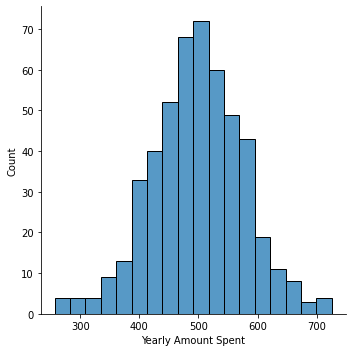

In [16]:
# Get the distribution plot
sns.displot(df['Yearly Amount Spent']);

Our distribution is not skewed which is okay.



## Distribution plots for features

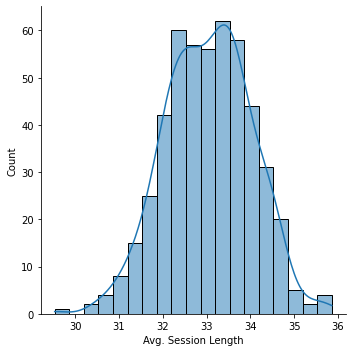

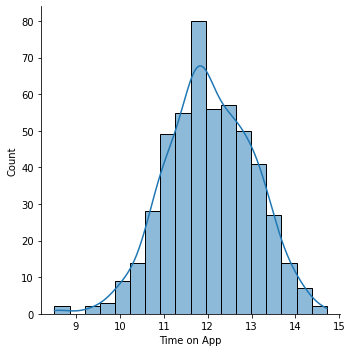

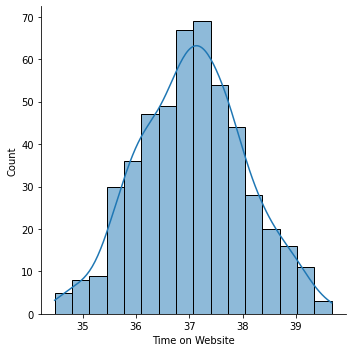

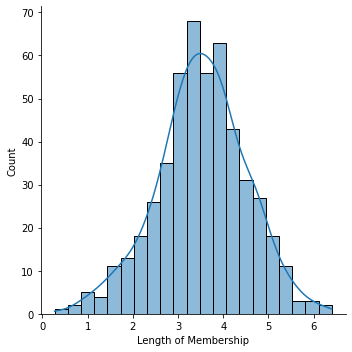

In [17]:
num = df.select_dtypes(exclude='object').drop(['Yearly Amount Spent'], axis=1).copy()

for i in range(len(num.columns)):   
    sns.displot(num.iloc[:,i],kde=True)
    plt.xlabel(num.columns[i])

plt.tight_layout()
plt.show()

## Assumption 3 - There must be no autocorrelation in the residuals. 

## Assumption 4 - There must be little or no multicollinearity in the data.

Correlation measures the relationship between two variables. When these two variables are so highly correlated that they explain each other (to the point that you can predict the one variable with the other), then we have Collinearity.

## Correlation

Correlation estimates the apparent strength of a linear relationship between an independent variable and a dependent variable. 

There are several methods for determining the correlation between two variables like the Pearson correlation method, Spearman correlation method, and Kendall correlation method.

<AxesSubplot:>

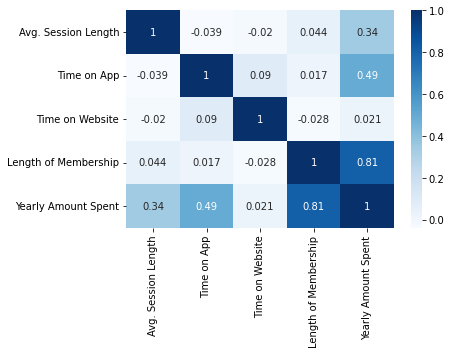

In [18]:

corr = df.corr(method="pearson")

sns.heatmap(corr,annot=True,cmap="Blues")

In [19]:
corr['Yearly Amount Spent'].sort_values(ascending=False).round(decimals=2)

Yearly Amount Spent     1.00
Length of Membership    0.81
Time on App             0.49
Avg. Session Length     0.34
Time on Website         0.02
Name: Yearly Amount Spent, dtype: float64

Length of Membership and TIme on App have the most impact on the Yearly Amount Spent

## Lets now check the correlation between our  independent variables

In [22]:
num = df.select_dtypes(exclude='object').drop(['Yearly Amount Spent'], axis=1)
corr = num.corr(method="pearson")

In [23]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs    

,attribute pair,correlation


We do not have any output and therefore we do not have any variables that are highly correlated with each other and that's the scenario we want.

## Defining our Independent variables X and Dependent Variable y

In [24]:
X = df[['Avg. Session Length', 'Time on App','Length of Membership','Time on Website']]
y = df['Yearly Amount Spent']


## Split Data into Training and Test Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Normalize the Data 

Feature scaling is done to standardize features that greatly vary in magnitude and units.This include : kNN algorithm, kMeans Clustering(Euclidean Distance), Linear Regression, Logistic Regression, and SVM.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
## Confirm scaling has occured
X_train


array([[ 0.32118295,  1.41633818, -0.26515981,  1.54218913],
       [ 0.20491518, -0.08547257, -0.12506137, -0.49533612],
       [-0.26059747,  0.77872898,  0.296333  ,  0.03228693],
       ...,
       [ 0.88692704,  1.03128167,  0.24062866,  0.55456189],
       [-0.3475318 ,  0.950826  ,  0.57209329, -0.55212445],
       [-0.76584089, -0.49480247,  1.26798481,  1.61761572]])

In [ ]:
#X_test

In [31]:
# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Stats Model

In [32]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [33]:
model = sm.OLS(y_train, X_train).fit()

In [34]:
 model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     5545.
Date:                 Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                         23:02:11   Log-Likelihood:                -1475.4
No. Observations:                  396   AIC:                             2961.
Df Residuals:                      391   BIC:                             2981.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.0323      0.508    986.640      0.000     500.034     502.031
x1            24.5649      0.509     48.294      0.000      23.565      25.565
x2            38.7219      0.511     75.765      0.000      37.717      39.727
x3            58.3532      0.509    114.576      0.000      57.352      59.354
x4             0.3120      0.511      0.610      0.542      -0.693       1.317
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.012
Skew:                          -0.087   Prob(JB):                        0.603
Kurtosis:                       3.177   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred, columns = ["Predicted Time on App"])

,Predicted Time on App
0,523.113537
1,672.141604
2,429.504418
3,314.417650
4,518.767407
...,...
95,481.436732
96,523.742616
97,315.314224
98,606.283411


## Hyperparameter tuning

In [36]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True, False]}
grid_model  = GridSearchCV(estimator=lm,
                           param_grid=param_grid,
                           n_jobs=-1)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [39]:
print("Best score: ", grid_model.best_score_, "Best parameters: ", grid_model.best_params_)

Best score:  0.9814448328052933 Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [40]:
lm = LinearRegression(copy_X= True,
                      fit_intercept= True,
                      normalize= False)
lm.fit(X_train,y_train)

LinearRegression()